In [175]:
import pandas as pd
import plotly
from datetime import datetime
import dateutil.parser
import numpy as np
import matplotlib.pyplot as plt
from mizani.breaks import date_breaks
from plotnine import *

# load in data
runs = pd.read_csv("runs.csv")

# Convert dates to datetime objects
runs['Activity Date'] = pd.to_datetime(runs['Activity Date'])

# Reduce to runs from July 2019 or later
start_date = datetime( 2019 , 7 , 1 )
runs = runs[runs['Activity Date'] >= start_date]

# Find runs over 7 miles (what I will be calling MR_plus runs)
runs['miles'] = round(runs['Distance']/1.609, 1)
MR_plus = runs[runs['Activity Type'] == 'Run']
MR_plus = MR_plus[MR_plus['miles'] >= 7]
# calculate the average pace of these runs
MR_plus['avg_pace'] = (MR_plus['Moving Time']/60)/(MR_plus['miles'])

# if you want to change it to a timedelta:
# MR_plus['avg_pace'] = pd.to_timedelta(MR_plus['avg_pace'], unit='m')

#
MR_plus['minutes'] = MR_plus['avg_pace'].astype(int).astype(str)
MR_plus['seconds'] = ((MR_plus['avg_pace']*60) % 60).round().astype(int).astype(str)

MR_plus['avg_pace_formatted'] = MR_plus['minutes'] + ':' + MR_plus['seconds']


# MR_plus['avg_pace_formatted'] = str(MR_plus['minutes']) + '-' + str(MR_plus['seconds'])
# my_date = datetime.strptime(MR_plus['avg_pace_formatted'], "%Y-%m-%d")
print(MR_plus['avg_pace_formatted'].head())
# print("%02d:%02d" % (MR_plus['minutes'], MR_plus['seconds']))


len(MR_plus)

29    9:47
37     8:8
38    8:15
41    7:45
43    7:30
Name: avg_pace_formatted, dtype: object


113

#### plot the MR+ runs

/Users/mandydavis/Documents/GitHub/nuxc_dataviz/venv/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/mandydavis/Documents/GitHub/nuxc_dataviz/venv/lib/python3.7/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_label : Removed 6 rows containing missing values.
/Users/mandydavis/Documents/GitHub/nuxc_dataviz/venv/lib/python3.7/site-packages/plotnine/guides/guides.py:200: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


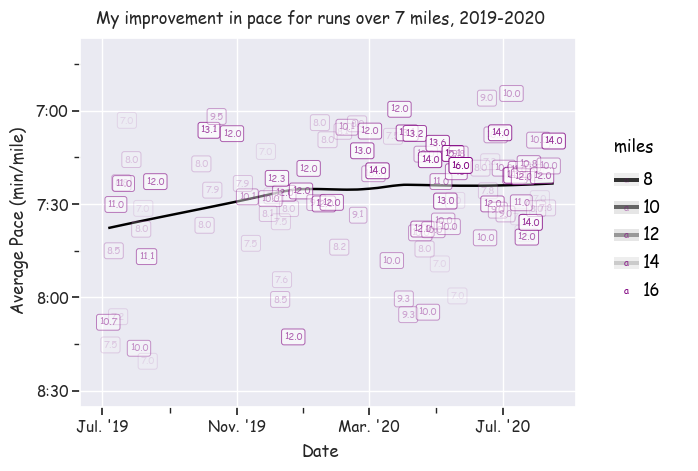

<ggplot: (301909713)>

In [177]:
(ggplot(MR_plus)
 + aes(x='Activity Date', y='avg_pace', label='miles', alpha='miles')
 + geom_smooth()
 + geom_label(size=7, color="black")
 + scale_fill_gradient(low = "red", high = "green")
 + labs(x='Date', y='Average Pace (min/mile)', title='My improvement in pace for runs over 7 miles, 2019-2020')
 + scale_x_datetime(breaks=date_breaks('4 months'), labels= ["Jul. '19", "Nov. '19", "Mar. '20", "Jul. '20"])
 + scale_y_reverse(limits= np.array([8.5, 6.7]), breaks= np.array([8.5, 8, 7.5, 7, 6.5]), labels=["8:30", "8:00", "7:30", "7:00", "6:30"])
 + theme_seaborn()
 + theme(text=element_text(family='fantasy'))
 )

In [ ]:
# save the graph as a png in the same directory
# improvement.save(filename="improvement")
